In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from levy_1d import get_levy_flight_1d
from mist_levy import *

We use `levy_1d.py` and the public code `mistree` (imported as `mist`) to generate Levy flight realisations/maps in 1D and 2D.

### 1D Rayleigh-Levy flight map

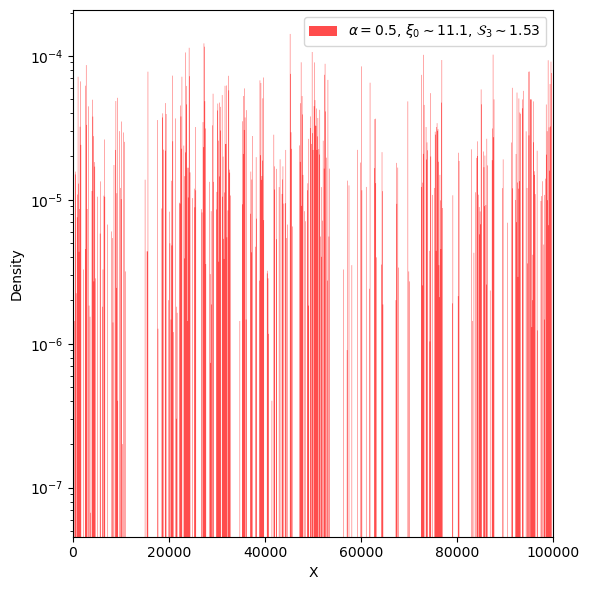

In [3]:
box_width=100000
grid_size = box_width; pixel_size = box_width/grid_size
smoothing_scale_per_pix=4

# bp2024
l_0=0.0004; alpha_0=1/2; n_steps = 3*int(box_width/pixel_size)
x = get_levy_flight_1d(n_steps, t_0=l_0, alpha=alpha_0, box_size=box_width, periodic=True)

density, x_edges = np.histogram(x, bins=grid_size, density=True)

# compute xi_0 and s3
density_smoothed = gaussian_filter((density-np.mean(density))/np.mean(density), \
                                   sigma=smoothing_scale_per_pix*pixel_size)+1
mean_density = np.mean(density_smoothed)
rho_density = density_smoothed/mean_density
xi_0 = np.var(rho_density) # local variance
s3 = np.mean((rho_density - np.mean(rho_density))**3)/(xi_0**2)

fig,ax=plt.subplots(figsize=(6,6))
ax.hist(x,bins=1000, histtype='stepfilled', density=True, color='red', alpha=0.7, \
        label=rf'$\alpha=${alpha_0}, $\xi_0\sim${np.round(xi_0, 1)}, ${{\cal S}}_3\sim${np.round(s3,2)}')

ax.set_xlim(0, box_width)
ax.set_yscale('log')
ax.set_ylabel('Density'); ax.set_xlabel('X'); ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

### 2D Rayleigh-Levy flight map

In [4]:
# this code block generates the 2D map
l_0 = 0.01; alpha_0 = 3/2; n_steps_per_pixel = 40
box_width=1000; pixel_size = 0.5; smoothing_scale_per_pix = 4

grid_size = int( box_width/pixel_size )
n_steps = int(n_steps_per_pixel*(grid_size**2))

# generate Levy flight
x, y = mist.get_levy_flight(n_steps, t_0=l_0, alpha=alpha_0, \
                            mode='2D', box_size=box_width, periodic=True)
density, x_edges, y_edges = np.histogram2d(x, y, bins=grid_size, density=True)

# gaussian smoothing to the density map
density_smoothed = gaussian_filter((density-np.mean(density))/np.mean(density), \
                                    sigma=smoothing_scale_per_pix*pixel_size)+1

# calculate statistics
mean_density = np.mean(density_smoothed)
rho_density = density_smoothed/mean_density

xi_0 = np.var(rho_density)
s3 = np.mean((rho_density - np.mean(rho_density))**3)/(xi_0**2)
print('local variance =', xi_0)
print('local skewness =', s3)

local variance = 2.376890240694543
local skewness = 1.5176898236141947


In [5]:
# compute bin centers
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2

parameters : $\alpha=$1.5, $\xi_0\sim$2.38, ${\cal S}_3\sim$1.52


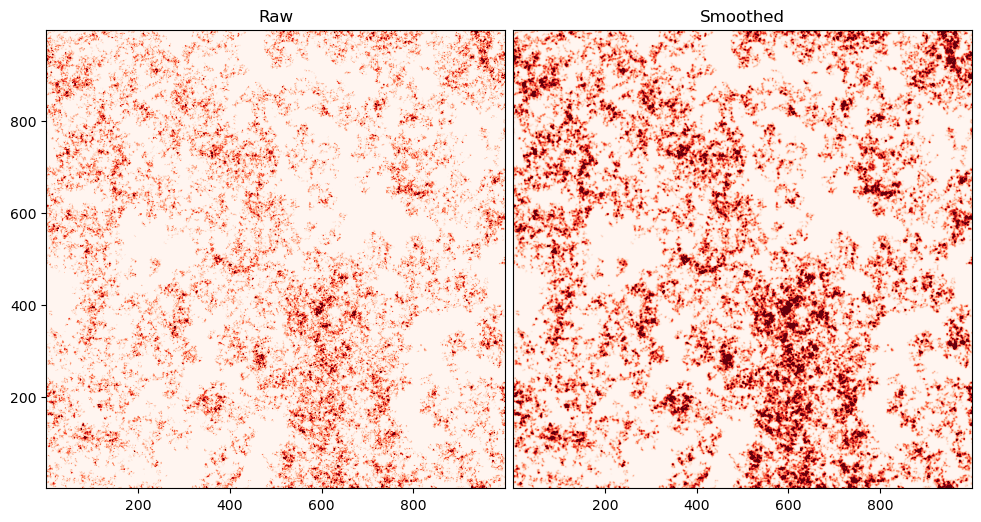

In [6]:
# plot the density map before and after smoothing
cmap='Reds'
extent=[x_centers.min(), x_centers.max(), y_centers.min(), y_centers.max()]
title=rf'$\alpha=${alpha_0}, $\xi_0\sim${np.round(xi_0, 2)}, ${{\cal S}}_3\sim${np.round(s3,2)}'
print('parameters :', title)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(density.T, origin='lower', extent=extent, cmap=cmap, vmin=0, vmax=1e-5)
plt.title('Raw')
# plt.colorbar(label='Density')

plt.subplot(1, 2, 2)
plt.imshow(density_smoothed.T, origin='lower', extent=extent, cmap=cmap, vmin=0, vmax=5)
plt.title('Smoothed')
plt.yticks([])
# plt.colorbar(label='Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

parameters : $\alpha=$1.5, $\xi_0\sim$2.38, ${\cal S}_3\sim$1.52


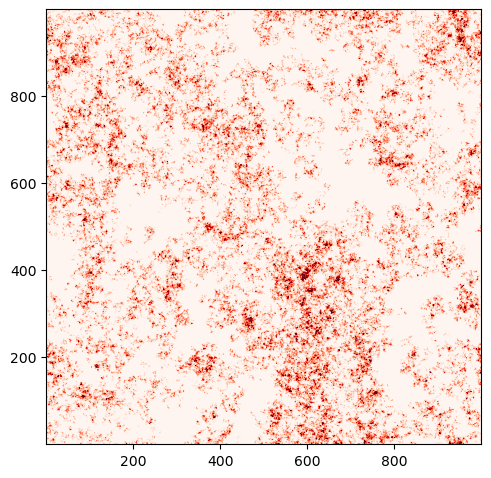

In [7]:
cmap='Reds'
extent=[x_centers.min(), x_centers.max(), y_centers.min(), y_centers.max()]
title=rf'$\alpha=${alpha_0}, $\xi_0\sim${np.round(xi_0, 2)}, ${{\cal S}}_3\sim${np.round(s3,2)}'
print('parameters :', title)

# plot the raw map
plt.figure(figsize=(5,5))
plt.imshow(density.T, origin='lower', extent=extent, cmap=cmap, vmin=0, vmax=1e-5, rasterized=True)

plt.tight_layout()
plt.savefig('figs/Levy2D_raw.pdf', bbox_inches='tight', dpi=100)
plt.show()

### End of notebook